# NumPy, Pandas & Matplotlib Integration


You will work with the “Global Power Plant Database” provided by the World Resources Institute, which contains detailed information about power plants worldwide. This dataset is ideal for practicing array manipulations, statistical analysis, and time series data handling.

---

Fields:

- `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- `country_long` (text): longer form of the country designation
- `name` (text): name or title of the power plant, generally in Romanized form
- `gppd_idnr` (text): 10 or 12 character identifier for the power plant
- `capacity_mw` (number): electrical generating capacity in megawatts
- `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- `primary_fuel` (text): energy source used in primary electricity generation or export
- `other_fuel1` (text): energy source used in electricity generation or export
- `other_fuel2` (text): energy source used in electricity generation or export
- `other_fuel3` (text): energy source used in electricity generation or export
- `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- `owner` (text): majority shareholder of the power plant, generally in Romanized form
- `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- `url` (text): web document corresponding to the `source` field
- `geolocation_source` (text): attribution for geolocation information
- `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- `year_of_capacity_data` (number): year the capacity information was reported
- `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
- `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
- `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
- `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- `generation_data_source` (text): attribution for the reported generation information
- `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013 (see [2])
- `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 (see [2])
- `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 (see [2])
- `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 (see [2])
- `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 (see [2])
- `estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013 (see section on this field below)
- `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 (see section on this field below)
- `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015 (see section on this field below)
- `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016 (see section on this field below)
- `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 (see section on this field below)

---

# 1. Data Import and Cleaning:

* Import the dataset using Pandas.
* Identify missing values and handle them appropriately.
* Use NumPy to convert relevant columns to numerical types if necessary.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

In [2]:
df = pd.read_csv('/content/global_power_plant_database.csv')

# Display basic dataframe info
print("### Dataset Preview")
display(df.head())
print("\n### Dataset Information")
df.info()
print("\n### Dataset Summary Statistics")
display(df.describe())

### Dataset Preview


<ipython-input-2-5270c2e8b878>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1



### Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner  

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


The dataset has **a lot** of fields. We need to focus on power plants by country and fuel types, time-related data (like year of establishment) to analyze trends over the years, geocoordinates.


### Missing Values


,Missing Values,Percentage (%)
country,0,0.000000
country_long,0,0.000000
name,0,0.000000
gppd_idnr,0,0.000000
capacity_mw,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
primary_fuel,0,0.000000
other_fuel1,32992,94.435539
other_fuel2,34660,99.209984


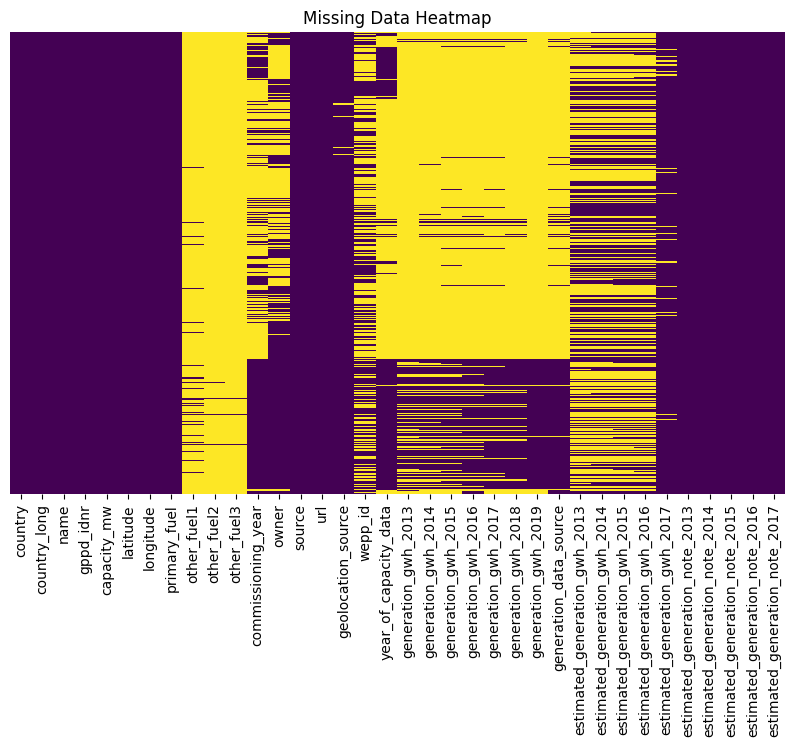

In [3]:
# missing values
print("\n### Missing Values")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_data, 'Percentage (%)': missing_percentage})
display(missing_table)

# visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Heatmap')
plt.show()

What we **can** remove without remorse are duplicates, if any:

In [4]:
# we count duplicates
print(f"## Number of duplicates: {df.duplicated().sum()}")

## Number of duplicates: 0



# 2. Exploratory Data Analysis:

* Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.
* Explore the distribution of power plants by country and fuel type.



The mean capacity is 163 MW, that is around the globe. The std is approx trice the mean so we can hope for sure a lot of dispersion. With min = 1 MW and max = 22500 MW, the range of this field is impresive. It is also a field to focus on outliers. It is the same case for the generation_gwh and estimated_generation_gwh fields.

The main columns we are interested are conveniently the ones without missing values (cols 0 to 7).

The other_fuel fields are not really a problem to have missing values (not every powerplant uses more than one type of fuel).

The time-related columns are a problem, many have missing values (except for the estimated_generation_note ones, which are string-type).


Instead of removing or imputing missing data, we can create secondary dataframes with the rows propicious for the analysis time at the moment. Also the time-related data will be transformed to date-type if needed.

For the case of studying a general (normal distributed) trends, like say global average, we must remove outliers.

There is also another detail about the outliers as we increase granularity: what do we do with giants like China? Do we consider them as separated datasets with their own distributions?

In [5]:
# # check distribution and flag production outliers
# def label_outliers_iqr(df, column):
#     """
#     it labels outliers
#     """
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df['is_outlier'] = ((df[column] < lower_bound) | (df[column] > upper_bound)).astype(int)

#     return df

In [6]:
# fuel types count
fuel_types_count = df.primary_fuel.value_counts()
print(f"## fuel types: {fuel_types_count}")

print()
# onehot encode primary_fuel
df_encoded = pd.get_dummies(df, columns=["primary_fuel"], prefix="", prefix_sep="")
df_encoded.columns

## fuel types: primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64



Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'other_fuel1', 'other_fuel2', 'other_fuel3',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'wepp_id', 'year_of_capacity_data', 'generation_gwh_2013',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019',
       'generation_data_source', 'estimated_generation_gwh_2013',
       'estimated_generation_gwh_2014', 'estimated_generation_gwh_2015',
       'estimated_generation_gwh_2016', 'estimated_generation_gwh_2017',
       'estimated_generation_note_2013', 'estimated_generation_note_2014',
       'estimated_generation_note_2015', 'estimated_generation_note_2016',
       'estimated_generation_note_2017', 'Biomass', 'Coal', 'Cogeneration',
       'Gas', 'Geothermal', 'Hydro', 'Nuclear', 'Oil', 'Other', 'Petcoke',
       'Solar', 'Storage', 'Waste', 'Wave and

We can see solar is comfortably at the head of fuel type. Its woth noting it doesnt mean it can generate a big amount of energy, like nuclear.

In [7]:
# we group by country, count power plants and take other details
df_grouped_by_country = df.groupby(["country", "country_long"]).agg({
    "name": "count",
    "capacity_mw": ["sum", "mean","std"],
    "primary_fuel": ["unique"],
    })

# we need to flatten the column structure
df_grouped_by_country.columns = ['_'.join(col).strip() for col in df_grouped_by_country.columns.values]

# rename for clarity
df_grouped_by_country = df_grouped_by_country.rename(columns={
    "name_count": "total plants",
    "capacity_mw_sum": "total capacity (MW)",
    "capacity_mw_mean": "mean capacity (MW)",
    "capacity_mw_std": "std capacity (MW)",
    # "primary_fuel_unique": "primary fuel",
    })

# reset the index to make 'country' and 'country_long' regular columns!!!!!!!!
df_grouped_by_country = df_grouped_by_country.reset_index().sort_values(by="total capacity (MW)", ascending=False)

display(df_grouped_by_country.head())

,country,country_long,total plants,total capacity (MW),mean capacity (MW),std capacity (MW),primary_fuel_unique
28,CHN,China,4235,1415067.380,334.136335,810.240993,"[Coal, Hydro, Wind, Solar, Gas, Nuclear, Oil, ..."
159,USA,United States of America,9833,1204638.050,122.509717,345.781348,"[Solar, Gas, Oil, Hydro, Wind, Coal, Biomass, ..."
70,IND,India,1589,316088.546,198.922936,470.138182,"[Solar, Coal, Wind, Gas, Hydro, Biomass, Oil, ..."
132,RUS,Russia,545,228220.050,418.752385,852.836129,"[Solar, Gas, Hydro, Coal, Nuclear, Biomass, Oi..."
79,JPN,Japan,522,215365.850,412.578257,911.230497,"[Solar, Oil, Wind, Hydro, Gas, Nuclear, Waste,..."


We must notice how different are mean capacity vs total capacity for every country. That is due power plants generally are not working at full capacity, if working at all. That depends on the time of the year, week and day.

We can qualify the countries by energy generation based on the IQR

In [8]:
# find quantiles
Q1 = df_grouped_by_country["total capacity (MW)"].quantile(0.25)
Q3 = df_grouped_by_country["total capacity (MW)"].quantile(0.75)

# classify
df_grouped_by_country["production ranking"] = pd.cut(
    df_grouped_by_country["total capacity (MW)"],
    bins=[-np.inf, Q1, Q3, np.inf],
    labels=["low", "medium", "high"]
)

print(f"## total countries are: {len(df_grouped_by_country)}")
print(f"## countries with high production: {len(df_grouped_by_country[df_grouped_by_country['production ranking'] == 'high'])}")
print(f"## countries with medium production: {len(df_grouped_by_country[df_grouped_by_country['production ranking'] == 'medium'])}")
print(f"## countries with low production: {len(df_grouped_by_country[df_grouped_by_country['production ranking'] == 'low'])}")

## total countries are: 167
## countries with high production: 42
## countries with medium production: 83
## countries with low production: 42


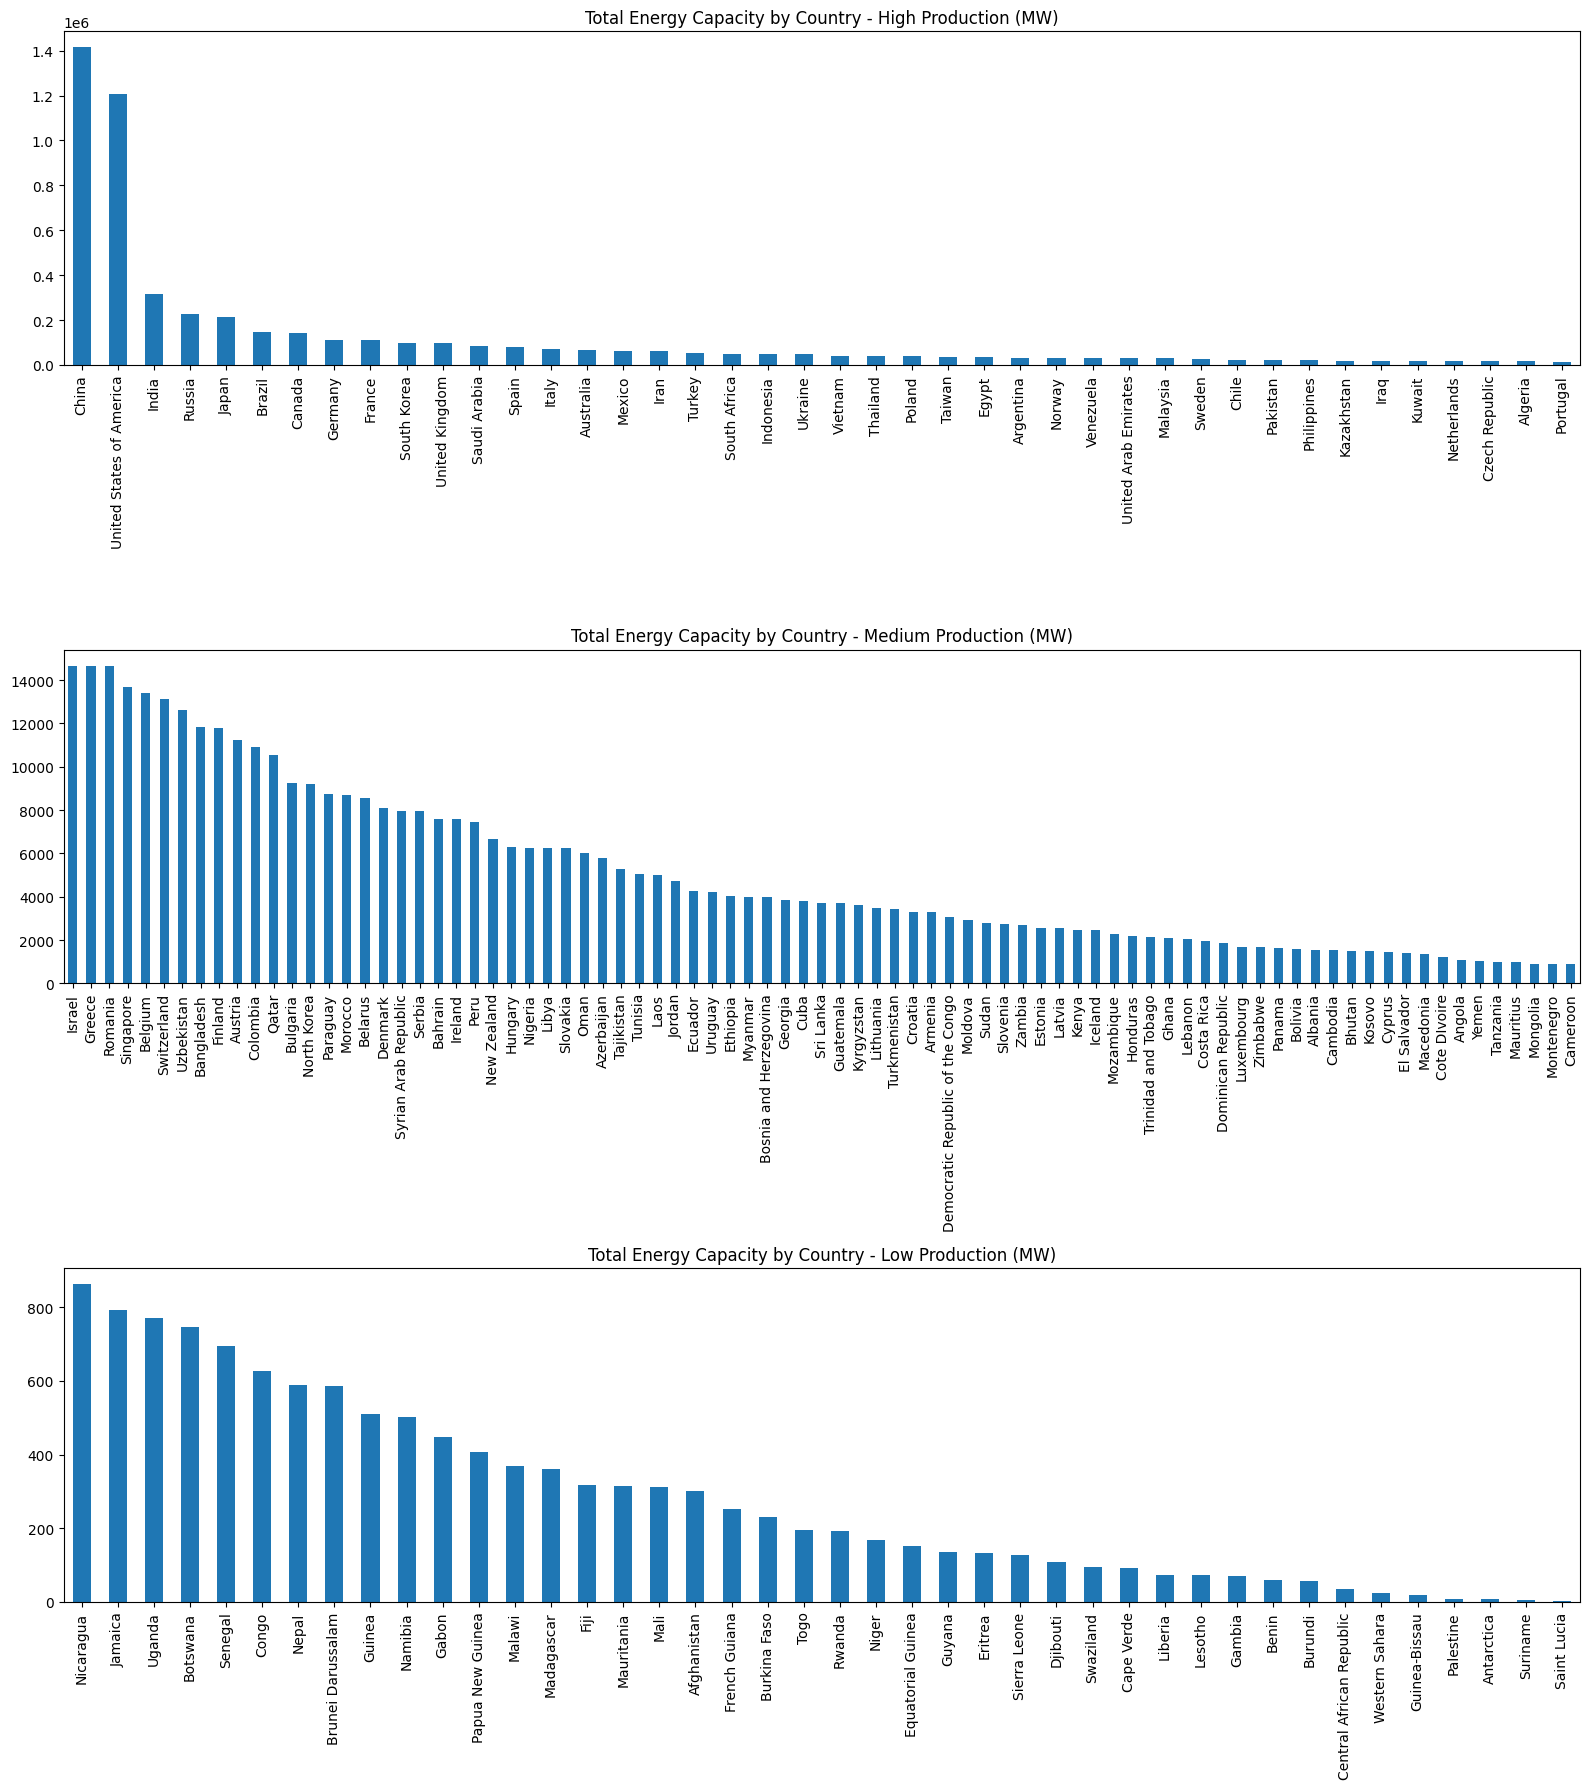

In [9]:
# define the production rankings for the loop
production_rankings = df_grouped_by_country['production ranking'].unique()

# create a figure with subplots
fig, axes = plt.subplots(nrows=len(production_rankings), ncols=1, figsize=(16, 18))

# Loop through each production ranking and create a subplot
for ax, ranking in zip(axes, production_rankings):
    # Filter the DataFrame for the current ranking
    df_filtered = df_grouped_by_country[df_grouped_by_country["production ranking"] == ranking]

    # Create a bar plot for the filtered DataFrame
    df_filtered.plot(
        kind="bar",
        x="country_long",
        y="total capacity (MW)",
        ax=ax,
        # alpha=0.7,
        legend=False  # Disable legend for individual plots
    )

    # Set titles and labels for each subplot
    ax.set_title(f"Total Energy Capacity by Country - {ranking.capitalize()} Production (MW)")
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# adjust layout to prevent overlap
plt.tight_layout()

# release the kraken
plt.show()

We can see how China and USA are two energy monsters, even for the high level energy producers countries!.

In [10]:
df_grouped_by_country.head()

,country,country_long,total plants,total capacity (MW),mean capacity (MW),std capacity (MW),primary_fuel_unique,production ranking
28,CHN,China,4235,1415067.380,334.136335,810.240993,"[Coal, Hydro, Wind, Solar, Gas, Nuclear, Oil, ...",high
159,USA,United States of America,9833,1204638.050,122.509717,345.781348,"[Solar, Gas, Oil, Hydro, Wind, Coal, Biomass, ...",high
70,IND,India,1589,316088.546,198.922936,470.138182,"[Solar, Coal, Wind, Gas, Hydro, Biomass, Oil, ...",high
132,RUS,Russia,545,228220.050,418.752385,852.836129,"[Solar, Gas, Hydro, Coal, Nuclear, Biomass, Oi...",high
79,JPN,Japan,522,215365.850,412.578257,911.230497,"[Solar, Oil, Wind, Hydro, Gas, Nuclear, Waste,...",high


In [11]:
# worldmap with hover text
p = px.choropleth(df_grouped_by_country,
                  locations='country_long',
                  locationmode='country names',
                  color='total capacity (MW)',
                  hover_name='country_long',
                  hover_data=[
                      'total plants',
                      'total capacity (MW)',
                      'mean capacity (MW)',
                      'std capacity (MW)',
                      'primary_fuel_unique',
                      'production ranking'
                  ],
                  color_continuous_scale='turbo',
                  title='Global Energy Production by Country'
                  )

# change size
p.update_layout(
    autosize=False, # so resize as we please
    width=1200,
    height=600,
    title_x=0.5 # centered
)

p

To identify the energy by fuel type, we need to redo the grouping:

In [12]:
# we list the types of fuel
fuel_types = df.primary_fuel.unique()

# we group df by country then by primary_fuel
df_grouped_by_fuel = df.groupby(["country", "country_long", "primary_fuel"]).agg({
    "name": "count",
    "capacity_mw": ["sum", "mean","std"],
    })

# we need to flatten the column structure
df_grouped_by_fuel.columns = ['_'.join(col).strip() for col in df_grouped_by_fuel.columns.values]

# reset index
df_grouped_by_fuel = df_grouped_by_fuel.reset_index().sort_values(by="capacity_mw_sum", ascending=False)

display(df_grouped_by_fuel.head())

,country,country_long,primary_fuel,name_count,capacity_mw_sum,capacity_mw_mean,capacity_mw_std
109,CHN,China,Coal,946,955718.00,1010.272727,923.570371
655,USA,United States of America,Gas,1818,546435.80,300.569747,442.854880
112,CHN,China,Hydro,947,259025.60,273.522281,1117.140483
653,USA,United States of America,Coal,286,249149.10,871.150699,811.361744
296,IND,India,Coal,253,204919.22,809.957391,854.572931


We can reclassify the energy by green and not-so-much:

In [13]:
# classify by energy type
green = ['Hydro', 'Solar', 'Wind', 'Biomass', 'Geothermal', 'Wave and Tidal']
not_green = ['Gas', 'Oil', 'Coal', 'Petcoke', 'Waste', 'Cogeneration', 'Other']

# add the energy type column
df_grouped_by_fuel['green energy'] = np.where(df_grouped_by_fuel['primary_fuel'].isin(green), 'True', 'False')

df_grouped_by_fuel.head()

,country,country_long,primary_fuel,name_count,capacity_mw_sum,capacity_mw_mean,capacity_mw_std,green energy
109,CHN,China,Coal,946,955718.00,1010.272727,923.570371,False
655,USA,United States of America,Gas,1818,546435.80,300.569747,442.854880,False
112,CHN,China,Hydro,947,259025.60,273.522281,1117.140483,True
653,USA,United States of America,Coal,286,249149.10,871.150699,811.361744,False
296,IND,India,Coal,253,204919.22,809.957391,854.572931,False


Now we know how much green and not green energy each one produces:

In [14]:
# we separate into two dataframes
df_green = df_grouped_by_fuel[df_grouped_by_fuel['green energy'] == 'True']
df_green_grouped = df_green.groupby(["country", "country_long"]).agg({
    # "name_count": "count",
    "capacity_mw_sum": "sum",
    }).reset_index()


df_not_green = df_grouped_by_fuel[df_grouped_by_fuel['green energy'] == 'False']
df_not_green_grouped = df_not_green.groupby(["country", "country_long"]).agg({
    # "name_count": "count",
    "capacity_mw_sum": "sum",
    }).reset_index()

# then reoder
df_green_grouped = df_green_grouped.sort_values(by="capacity_mw_sum", ascending=False)
df_not_green_grouped = df_not_green_grouped.sort_values(by="capacity_mw_sum", ascending=False)

# df_green_grouped.head()

In [15]:
print("## top ten green energy countries:\n")
print(df_green_grouped.head(10))
print("\n\n## top ten not green energy countries:\n")
print(df_not_green_grouped.head(10))

## top ten green energy countries:

    country              country_long  capacity_mw_sum
25      CHN                     China     364843.88000
143     USA  United States of America     253116.55000
19      BRA                    Brazil     122985.52113
22      CAN                    Canada      97405.30000
61      IND                     India      75760.98000
119     RUS                    Russia      47128.44000
48      GBR            United Kingdom      39864.28448
46      FRA                    France      34515.92890
70      JPN                     Japan      33811.90000
41      ESP                     Spain      31917.82900


## top ten not green energy countries:

    country              country_long  capacity_mw_sum
26      CHN                     China      1050223.500
146     USA  United States of America       951521.500
67      IND                     India       240327.566
75      JPN                     Japan       181553.950
121     RUS                    Russia     

We appreciate the ranking is **not** the same fro green - not green!!

Finally we can compare total world green/non-green production:

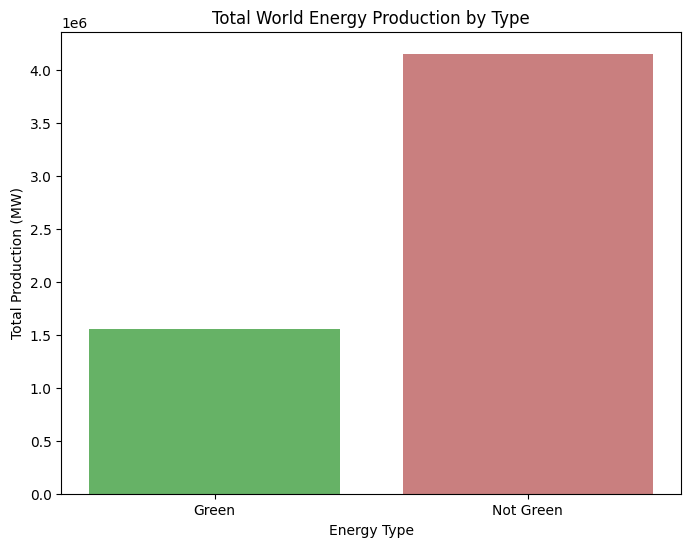

In [16]:
total_green = df_green_grouped['capacity_mw_sum'].sum()
total_not_green = df_not_green_grouped['capacity_mw_sum'].sum()

plt.figure(figsize=(8, 6))
plt.bar(['Green', 'Not Green'], [total_green, total_not_green], color=['green', 'brown'], alpha=.6)
plt.xlabel('Energy Type')
plt.ylabel('Total Production (MW)')
plt.title('Total World Energy Production by Type')
plt.show()

## Power Output Statistics by Fuel Type:


,mean,median,std,count
primary_fuel,,,,
Nuclear,2091.855179,1888.00000,1303.509273,195
Coal,843.579828,600.00000,888.187187,2330
Gas,373.449375,147.50000,560.934146,3998
Petcoke,202.048125,65.48875,476.986459,12
Hydro,147.171551,20.00000,549.809328,7156
Oil,112.878754,9.00000,392.009039,2320
Cogeneration,98.731707,31.90000,283.428252,41
Other,84.020000,40.00000,145.891392,43
Geothermal,67.130952,30.00000,114.640890,189


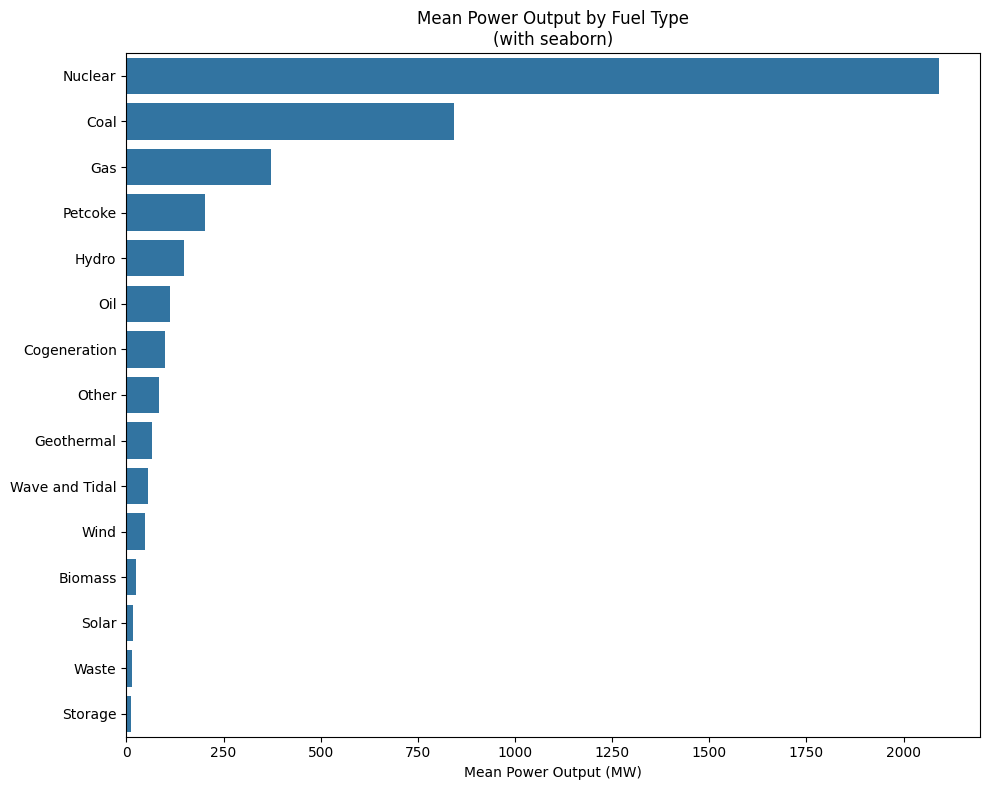

In [17]:
# we group again but by fuel sources
fuel_sources = df.groupby("primary_fuel")["capacity_mw"].agg(["mean", "median", "std", "count"]).sort_values(by="mean", ascending=False)

print("## Power Output Statistics by Fuel Type:")
display(fuel_sources)
print()

plt.figure(figsize=(10, 8))
sns.barplot(x="mean", y=fuel_sources.index, data=fuel_sources, orient="h")
plt.xlabel("Mean Power Output (MW)")
plt.ylabel("")
plt.title("Mean Power Output by Fuel Type\n(with seaborn)")
plt.tight_layout()
plt.show()

# 3. Statistical Analysis:

* Perform a statistical analysis of power output by fuel type using NumPy`s statistical functions.
* Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.



Note the output of nuclear against the rest, even when we saw nuclaer plant population is far from the other sources amount.

Now we continue with the NumPy analysis:

In [18]:
# we group again...........
fuel_sources = df.groupby('primary_fuel')['capacity_mw'].agg(list).reset_index()
display(fuel_sources.head())
print()

# Perform statistical analysis using NumPy
results = {}

for index, row in fuel_sources.iterrows():
    fuel = row['primary_fuel']
    capacities = np.array(row['capacity_mw'])

    # calculate statistics
    mean_capacity = np.mean(capacities)
    # median_capacity = np.median(capacities)
    std_dev_capacity = np.std(capacities)
    min_capacity = np.min(capacities)
    max_capacity = np.max(capacities)

    # store results
    results[fuel] = {
        'Mean Capacity (MW)': mean_capacity,
        # 'Median Capacity (MW)': median_capacity,
        'Standard Deviation (MW)': std_dev_capacity,
        'Min Capacity (MW)': min_capacity,
        'Max Capacity (MW)': max_capacity
    }

# convert results to dataframe and transpose
results_df = pd.DataFrame(results).T

display(results_df.sort_values(by='Mean Capacity (MW)', ascending=False))

,primary_fuel,capacity_mw
0,Biomass,"[38.0, 30.0, 10.5, 150.0, 25.0, 9.0, 8.0, 7.5,..."
1,Coal,"[620.0, 361.0, 1982.2, 13.2, 206.0, 216.0, 589..."
2,Cogeneration,"[180.0, 1404.0, 65.0, 32.0, 35.0, 50.0, 1240.0..."
3,Gas,"[42.0, 520.0, 71.0, 560.0, 100.0, 450.0, 450.0..."
4,Geothermal,"[1.0, 25.1, 5.0, 115.0, 27.5, 15.45, 36.0, 14...."


,Mean Capacity (MW),Standard Deviation (MW),Min Capacity (MW),Max Capacity (MW)
Nuclear,2091.855179,1300.162646,20.0,8212.00
Coal,843.579828,887.996568,1.2,7000.00
Gas,373.449375,560.863990,1.0,8865.00
Petcoke,202.048125,456.679766,4.7,1707.30
Hydro,147.171551,549.770911,1.0,22500.00
Oil,112.878754,391.924545,1.0,6794.00
Cogeneration,98.731707,279.950473,1.6,1404.00
Other,84.020000,144.185002,4.5,845.26
Geothermal,67.130952,114.337205,1.0,1163.00
Wave and Tidal,55.220000,96.235106,1.0,254.00


The nuclear type is at the head with more than twice the mean capacity than the second place (coal)

Hydro and oil have similar averages, we can compare them to see if we can hypothesize that **there is a difference between them**:

In [19]:
hydro = df[df['primary_fuel'] == 'Hydro']['capacity_mw']
oil = df[df['primary_fuel'] == 'Oil']['capacity_mw']

t_statistic, p_value = stats.ttest_ind(hydro, oil)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 2.7835598840896365
P-value: 0.0053872489895566665


Even though both power sources have similar means, the p-value is much lower than 0.05. So we reject the null hypothesi and can affirm they are different.

# 4. Time Series Analysis:

* If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.
* Explore how the mix of fuel types for power generation has evolved over the years.



So we extract the specific cols to an array

In [20]:
# df.columns

# select columns for time series
columns = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
           'generation_gwh_2019']

# generate years arrange
years = np.arange(2013, 2020)

# transform to np array and drop missing values
data = df[columns].dropna().to_numpy()

# obtain desired stats by year column
mean_generation = np.mean(data, axis=0)
std_generation = np.std(data, axis=0)

print("## Mean Generation (GWh):")
print(mean_generation)
print("\n## Standard Deviation of Generation (GWh):")
print(std_generation)

## Mean Generation (GWh):
[574.70024414 569.37824583 580.33682628 558.92291064 549.53113461
 553.12364611 608.50112021]

## Standard Deviation of Generation (GWh):
[2072.99387922 2078.44483192 2058.96051721 2032.66816529 2032.12934937
 2029.49160948 2080.25996696]


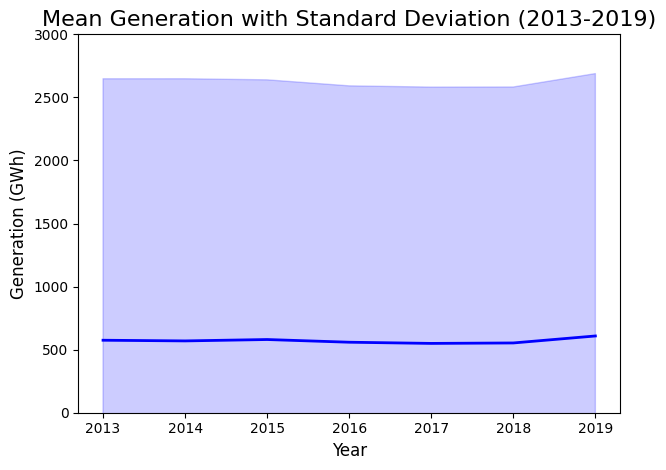

In [21]:
# Plot the mean line
sns.lineplot(x=years, y=mean_generation, color='blue', linewidth=2)

# Add the ribbon (standard deviation)
plt.fill_between(years, mean_generation - std_generation, mean_generation + std_generation, alpha=0.2, color='blue')

# Customize the plot
plt.title('Mean Generation with Standard Deviation (2013-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Generation (GWh)', fontsize=12)
plt.ylim(0, 3000)

# Show the plot
plt.tight_layout()
plt.show()

# 5. Advanced Visualization:

* Create visualizations using Matplotlib and Seaborn to illustrate your findings. (done)
* Consider plotting the geographical distribution of power plants using latitude and longitude data, if available. (done with power generation instead)



# 6. Matrix Operations in Real-World Context:

* Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).
* Discuss the relevance of eigenvectors and eigenvalues in this context.



Relationship between capacity and fuel type using one-hot encoded fuel types

In [22]:
# Extract the columns corresponding to fuel types
fuel_type_data = df_encoded[fuel_types].values

# Calculate the covariance matrix
cov_matrix = np.cov(fuel_type_data.T)

# Create a DataFrame for better visualization (optional)
# cov_df = pd.DataFrame(cov_matrix, index=fuel_types, columns=fuel_types)

# print("Covariance Matrix:")
# print(cov_df)


# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("\n### Covariance Matrix:")
print(cov_matrix)

print("\n### Eigenvalues:")
print(eigenvalues)

print("\n### Eigenvectors:")
print(eigenvectors)


### Covariance Matrix:
[[ 1.62880332e-01 -6.25312723e-02 -2.34411652e-02 -2.52118585e-04
  -1.36026771e-02 -3.13330632e-02 -1.14332847e-03 -1.36613094e-02
  -6.26192206e-03 -8.38440876e-03 -5.86322291e-05 -7.03586749e-05
  -1.10814913e-03 -7.91535092e-04 -2.40392139e-04]
 [-6.25312723e-02  2.12087271e-01 -3.49357220e-02 -3.75746885e-04
  -2.02728552e-02 -4.66974733e-02 -1.70396843e-03 -2.03602382e-02
  -9.33250403e-03 -1.24957685e-02 -8.73829965e-05 -1.04859596e-04
  -1.65153863e-03 -1.17967045e-03 -3.58270286e-04]
 [-2.34411652e-02 -3.49357220e-02  1.01344713e-01 -1.40856638e-04
  -7.59970699e-03 -1.75055320e-02 -6.38768475e-04 -7.63246435e-03
  -3.49848580e-03 -4.68430215e-03 -3.27573577e-05 -3.93088293e-05
  -6.19114061e-04 -4.42224329e-04 -1.34305167e-04]
 [-2.52118585e-04 -3.75746885e-04 -1.40856638e-04  1.22934234e-03
  -8.17377190e-05 -1.88278608e-04 -6.87019621e-06 -8.20900368e-05
  -3.76275362e-05 -5.03814389e-05 -3.52317754e-07 -4.22781305e-07
  -6.65880556e-06 -4.75628968e-

Interpretation:

Eigenvectors represent principal components – directions of greatest variance in the data.

Eigenvalues represent the amount of variance explained by each principal component.

The eigenvector with the largest eigenvalue corresponds to the direction of maximum variance.

In this case, principal components may reveal combinations of fuel types and capacity that capture the main patterns in power plant characteristics

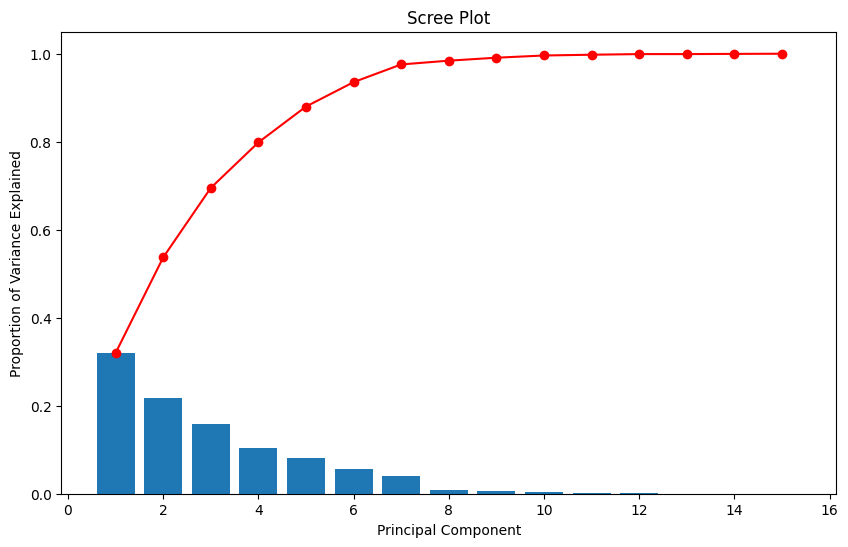

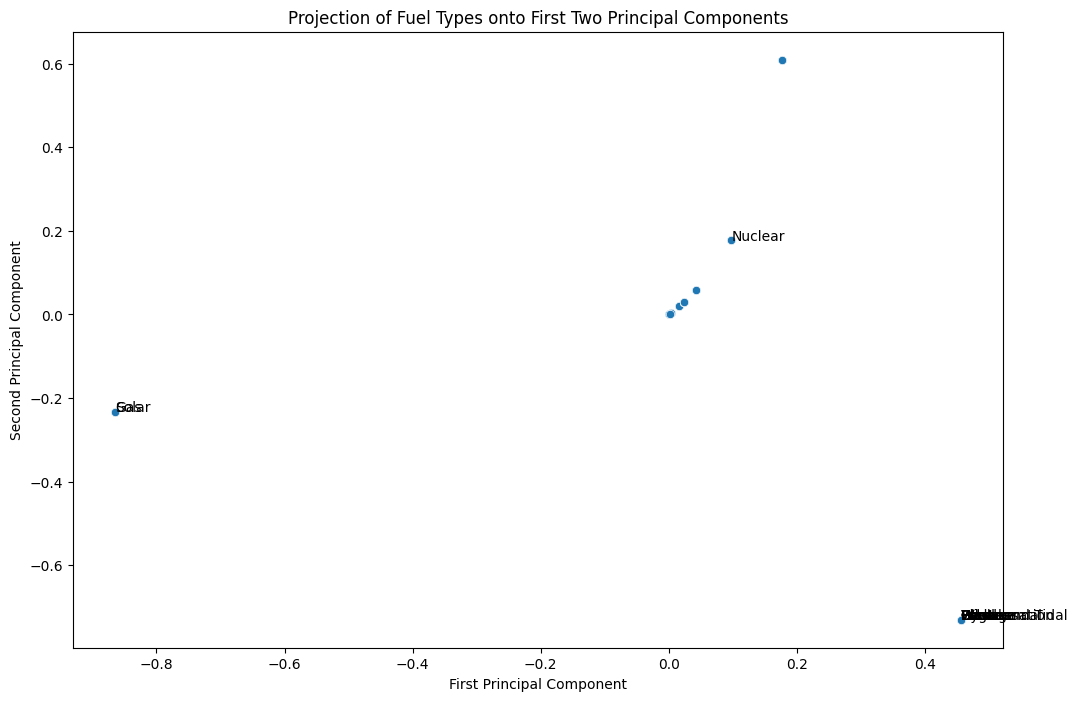

In [23]:
# Calculate the explained variance ratio
total_var = np.sum(eigenvalues)
var_ratio = eigenvalues / total_var
cumulative_var_ratio = np.cumsum(var_ratio)

# Scree plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(eigenvalues) + 1), var_ratio)
plt.plot(range(1, len(eigenvalues) + 1), cumulative_var_ratio, 'ro-')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

# Project data onto the first two principal components
pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]
projected_data = np.column_stack((fuel_type_data.dot(pc1), fuel_type_data.dot(pc2)))

# Plot the projection
plt.figure(figsize=(12, 8))
sns.scatterplot(x=projected_data[:, 0], y=projected_data[:, 1])

# Add labels for each point
for i, fuel in enumerate(fuel_types):
    plt.annotate(fuel, (projected_data[i, 0], projected_data[i, 1]))

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Projection of Fuel Types onto First Two Principal Components')
plt.show()

The dimensionality can be reduced to 7, from the original 14.

# 7. Integrating NumPy with Pandas and Matplotlib:

* Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.
* Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

Complex filtering in Pandas using NumPy arrays:

In [24]:
# Create a boolean NumPy array based on a condition
capacity_threshold = 1000  # threshold
capacity_filter = np.where(df['capacity_mw'] > capacity_threshold, True, False)

# Use the NumPy array to filter the Pandas DataFrame
filtered_df = df[capacity_filter]

# Display the filtered data
print("## Filtered DataFrame (Capacity > 1000 MW):")
display(filtered_df.head())

## Filtered DataFrame (Capacity > 1000 MW):


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
36,DZA,Algeria,Hadjret Ennous,WRI1023768,1200.0,36.5767,2.0797,Gas,Oil,NaN,...,NaN,NaN,NaN,NaN,5010.64,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
49,DZA,Algeria,Koudiet Eddraouch,WRI1023769,1200.0,36.8850,8.0778,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,5010.64,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
68,DZA,Algeria,Terga,WRI1023770,1200.0,35.4608,-1.2295,Gas,NaN,NaN,...,NaN,NaN,NaN,NaN,5010.64,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
95,ARG,Argentina,ALICURA,ARG0000230,1050.0,-40.5800,-70.7489,Hydro,NaN,NaN,...,2896.84,3621.29,3575.78,3416.89,2896.84,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
141,ARG,Argentina,COSTANERA,ARG0000046,1982.2,-34.6260,-58.3393,Coal,Gas,Other,...,NaN,NaN,NaN,NaN,10273.70,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


Scatter plot with error bars using NumPy arrays

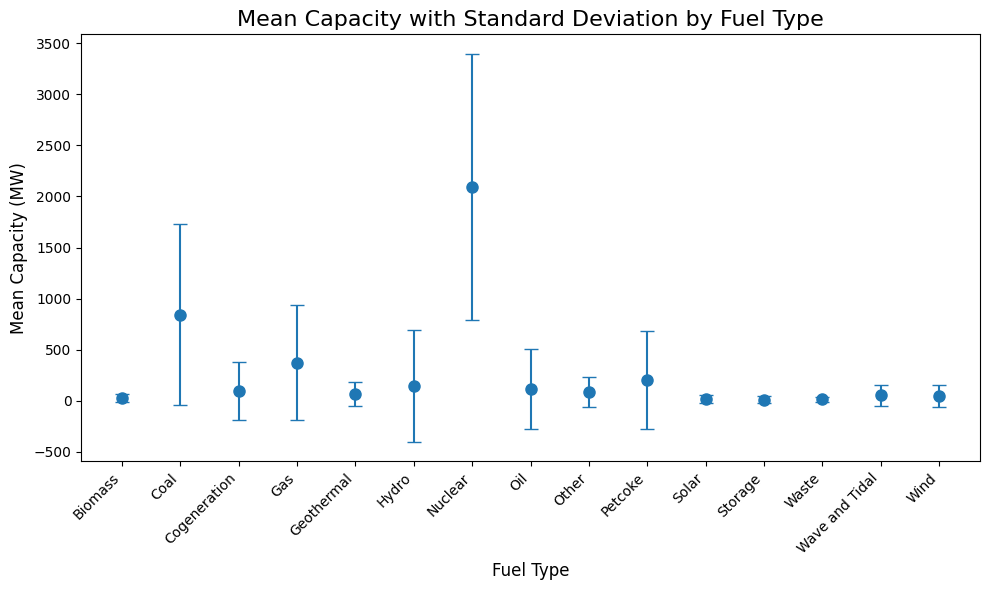

In [25]:
# Group data by fuel type and calculate mean capacity and standard deviation
fuel_stats = df.groupby('primary_fuel')['capacity_mw'].agg(['mean', 'std'])

# Extract data for plotting using NumPy arrays
fuel_types = np.array(fuel_stats.index)
mean_capacities = np.array(fuel_stats['mean'])
std_dev_capacities = np.array(fuel_stats['std'])

# Create the scatter plot with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(fuel_types, mean_capacities, yerr=std_dev_capacities, fmt='o', capsize=5, markersize=8)

# Customize the plot
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Mean Capacity (MW)', fontsize=12)
plt.title('Mean Capacity with Standard Deviation by Fuel Type', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()